# Scratch Code for Project 01-Benson (Draft 2.0)

## List of Imports

In [46]:
from __future__ import print_function, division

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import Image

%matplotlib inline

## Loading the Dataset

In [47]:
# load it all up with URLs 
datelist = ['170506', '170513', '170520', '170527', '170603']
may_df_raw = pd.DataFrame()
base_url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_'

for date in datelist:
    csv_url = f"{base_url}{date}.txt"
    print("Loading", csv_url)
    new_df = pd.read_csv(csv_url)
    may_df_raw = pd.concat([may_df_raw, new_df], ignore_index = True)

Loading http://web.mta.info/developers/data/nyct/turnstile/turnstile_170506.txt
Loading http://web.mta.info/developers/data/nyct/turnstile/turnstile_170513.txt
Loading http://web.mta.info/developers/data/nyct/turnstile/turnstile_170520.txt
Loading http://web.mta.info/developers/data/nyct/turnstile/turnstile_170527.txt
Loading http://web.mta.info/developers/data/nyct/turnstile/turnstile_170603.txt


## Cleaning the Data

In [48]:
# eventually I'll take all the cleaning/sorting operations and put them in this section

In [49]:
# Column 'EXITS' has a ton of whitespaces in the name, so we strip it
for col in may_df_raw.columns:
    may_df_raw.rename(columns = {col: col.strip()}, inplace=True)
may_df_raw.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [50]:
may_df_raw["UNIQUE_STATION"] = may_df_raw["STATION"] + ' - ' + may_df_raw["LINENAME"]
# confirm that duplicate station names are now made unique when merged with line name
for station in sorted(may_df_raw["UNIQUE_STATION"].unique()):
    print(station)

1 AV - L
103 ST - 1
103 ST - 6
103 ST - BC
103 ST-CORONA - 7
104 ST - A
104 ST - JZ
110 ST - 6
111 ST - 7
111 ST - A
111 ST - J
116 ST - 23
116 ST - 6
116 ST - BC
116 ST-COLUMBIA - 1
121 ST - JZ
125 ST - 1
125 ST - 23
125 ST - 456
125 ST - ACBD
135 ST - 23
135 ST - BC
137 ST CITY COL - 1
138/GRAND CONC - 45
14 ST - 123FLM
14 ST - ACEL
14 ST - FLM123
14 ST-UNION SQ - 456LNQRW
14 ST-UNION SQ - LNQR456W
145 ST - 1
145 ST - 3
145 ST - ABCD
149/GRAND CONC - 245
14TH STREET - 1
15 ST-PROSPECT - FG
155 ST - BD
155 ST - C
157 ST - 1
161/YANKEE STAD - 4BD
161/YANKEE STAD - BD4
163 ST-AMSTERDM - C
167 ST - 4
167 ST - BD
168 ST - 1AC
168 ST - AC1
169 ST - F
170 ST - 4
170 ST - BD
174 ST - 25
174-175 STS - BD
175 ST - A
176 ST - 4
18 AV - D
18 AV - F
18 AV - N
18 ST - 1
181 ST - 1
181 ST - A
182-183 STS - BD
183 ST - 4
190 ST - A
191 ST - 1
2 AV - F
20 AV - D
20 AV - N
207 ST - 1
21 ST - G
21 ST-QNSBRIDGE - F
215 ST - 1
219 ST - 25
225 ST - 25
23 ST - 1
23 ST - 6
23 ST - CE
23 ST - FM
23 ST - NRW


In [51]:
may_df_sorted = may_df_raw.sort_values(['UNIQUE_STATION', 'UNIT', 'C/A', 'SCP', 'DATE', 'TIME']).reset_index()
may_df_sorted.head(5)

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,UNIQUE_STATION
0,29387,H007,R248,00-00-00,1 AV,L,BMT,04/29/2017,00:00:00,REGULAR,12278147,13533772,1 AV - L
1,29388,H007,R248,00-00-00,1 AV,L,BMT,04/29/2017,04:00:00,REGULAR,12278188,13534099,1 AV - L
2,29389,H007,R248,00-00-00,1 AV,L,BMT,04/29/2017,08:00:00,REGULAR,12278271,13534359,1 AV - L
3,29390,H007,R248,00-00-00,1 AV,L,BMT,04/29/2017,12:00:00,REGULAR,12278813,13535235,1 AV - L
4,29391,H007,R248,00-00-00,1 AV,L,BMT,04/29/2017,16:00:00,REGULAR,12279597,13536282,1 AV - L


In [52]:
print("Unique Values")
for col in may_df_sorted.columns:
    print(f"    *\t{col}:", len(may_df_sorted[col].unique()))

Unique Values
    *	index: 981047
    *	C/A: 734
    *	UNIT: 467
    *	SCP: 231
    *	STATION: 376
    *	LINENAME: 114
    *	DIVISION: 6
    *	DATE: 35
    *	TIME: 32851
    *	DESC: 2
    *	ENTRIES: 788004
    *	EXITS: 767013
    *	UNIQUE_STATION: 476


In [53]:
may_df = may_df_sorted.filter(['UNIQUE_STATION', 'UNIT', 'C/A', 'SCP', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'])

# look at 50 rows for kicks
may_df.sample(50, random_state=23)

,UNIQUE_STATION,UNIT,C/A,SCP,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
251882,50 ST - D,R234,E004,00-00-01,BMT,06/02/2017,00:00:00,REGULAR,4919456,5021575
695599,JACKSON AV - 25,R405,R312,00-00-00,IRT,05/13/2017,21:00:00,REGULAR,2586499,247644
279416,59 ST COLUMBUS - ABCD1,R084,N049,01-02-01,IND,05/21/2017,04:00:00,REGULAR,15270179,12471518
110435,207 ST - 1,R037,R188,00-06-01,IRT,05/15/2017,04:00:00,REGULAR,582930,1193840
267719,59 ST - 456NQRW,R050,R244A,01-06-00,IRT,05/24/2017,12:00:00,REGULAR,7470706,9358933
757514,LEXINGTON AV/53 - EM6,R017,N305,01-03-03,IND,05/09/2017,00:00:00,REGULAR,11375346,8629190
651788,GRD CNTRL-42 ST - 4567S,R045,R236,00-03-01,IRT,05/23/2017,17:00:00,REGULAR,1091123,409212
173167,34 ST-PENN STA - 123,R031,R137,02-03-01,IRT,05/17/2017,16:00:00,REGULAR,7142324,4727495
284369,6 AV - FLM123,R163,H003,01-00-01,BMT,05/05/2017,20:00:00,REGULAR,5154006,1330227
597684,FLUSHING-MAIN - 7,R055,R533,00-03-07,IRT,05/20/2017,16:00:00,REGULAR,2047824,1011354


#### What are all the divisions we have here...?

In [54]:
may_df.DIVISION.unique()

array(['BMT', 'IRT', 'IND', 'PTH', 'RIT', 'SRT'], dtype=object)

* BMT, IRT, and IND are the three companies that were absorbed into the MTA
* PTH is the PATH train into NJ
* SRT is perhaps the Staten Island Railway?

In [55]:
may_df[may_df['DIVISION'] == 'SRT']['UNIQUE_STATION'].value_counts()

ST. GEORGE - 1       5476
TOMPKINSVILLE - 1    1484
Name: UNIQUE_STATION, dtype: int64

### Take a closer look at a busy station to investigate relationships between variables

In [56]:
fulton_df = may_df[may_df['UNIQUE_STATION'] == 'FULTON ST - 2345ACJZ']

In [57]:
fulton_df[fulton_df['DESC'] == 'RECOVR AUD'].head(10)

,UNIQUE_STATION,UNIT,C/A,SCP,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
623811,FULTON ST - 2345ACJZ,R014,R205A,04-02-00,IRT,05/25/2017,13:00:00,RECOVR AUD,1104387,761818
624020,FULTON ST - 2345ACJZ,R014,R205A,04-02-01,IRT,05/25/2017,13:00:00,RECOVR AUD,1514941,328997
624230,FULTON ST - 2345ACJZ,R014,R205A,04-02-02,IRT,05/25/2017,13:00:00,RECOVR AUD,1157219,102365
624440,FULTON ST - 2345ACJZ,R014,R205A,04-02-03,IRT,05/25/2017,13:00:00,RECOVR AUD,178299,4565
624649,FULTON ST - 2345ACJZ,R014,R205A,04-03-00,IRT,05/25/2017,13:00:00,RECOVR AUD,3427322,2660966
624859,FULTON ST - 2345ACJZ,R014,R205A,04-03-01,IRT,05/25/2017,13:00:00,RECOVR AUD,2175120,1291517
625068,FULTON ST - 2345ACJZ,R014,R205A,04-05-00,IRT,05/25/2017,13:00:00,RECOVR AUD,130,0
625278,FULTON ST - 2345ACJZ,R014,R205A,04-05-01,IRT,05/25/2017,13:00:00,RECOVR AUD,5,159
629124,FULTON ST - 2345ACJZ,R028,N098,00-00-00,IND,05/04/2017,07:00:00,RECOVR AUD,3036040,4922580
629335,FULTON ST - 2345ACJZ,R028,N098,00-00-01,IND,05/04/2017,07:00:00,RECOVR AUD,18235046,8317563


In [58]:
# a lonely turnstile that rarely gets used...
fulton_df.loc[625065:625071]

,UNIQUE_STATION,UNIT,C/A,SCP,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
625065,FULTON ST - 2345ACJZ,R014,R205A,04-05-00,IRT,05/25/2017,01:00:00,REGULAR,130,0
625066,FULTON ST - 2345ACJZ,R014,R205A,04-05-00,IRT,05/25/2017,05:00:00,REGULAR,130,0
625067,FULTON ST - 2345ACJZ,R014,R205A,04-05-00,IRT,05/25/2017,09:00:00,REGULAR,130,0
625068,FULTON ST - 2345ACJZ,R014,R205A,04-05-00,IRT,05/25/2017,13:00:00,RECOVR AUD,130,0
625069,FULTON ST - 2345ACJZ,R014,R205A,04-05-00,IRT,05/25/2017,17:00:00,REGULAR,130,0
625070,FULTON ST - 2345ACJZ,R014,R205A,04-05-00,IRT,05/25/2017,21:00:00,REGULAR,130,0
625071,FULTON ST - 2345ACJZ,R014,R205A,04-05-00,IRT,05/26/2017,01:00:00,REGULAR,130,0


In [59]:
# and another...
fulton_df.loc[630598:630604]

,UNIQUE_STATION,UNIT,C/A,SCP,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
630598,FULTON ST - 2345ACJZ,R028,N098,00-05-01,IND,05/03/2017,19:00:00,REGULAR,0,240
630599,FULTON ST - 2345ACJZ,R028,N098,00-05-01,IND,05/03/2017,23:00:00,REGULAR,0,240
630600,FULTON ST - 2345ACJZ,R028,N098,00-05-01,IND,05/04/2017,03:00:00,REGULAR,0,240
630601,FULTON ST - 2345ACJZ,R028,N098,00-05-01,IND,05/04/2017,07:00:00,RECOVR AUD,0,240
630602,FULTON ST - 2345ACJZ,R028,N098,00-05-01,IND,05/04/2017,11:00:00,REGULAR,0,240
630603,FULTON ST - 2345ACJZ,R028,N098,00-05-01,IND,05/04/2017,15:00:00,REGULAR,0,240
630604,FULTON ST - 2345ACJZ,R028,N098,00-05-01,IND,05/04/2017,19:00:00,REGULAR,0,241


In [60]:
# one more populated
fulton_df.loc[631442:631448]

,UNIQUE_STATION,UNIT,C/A,SCP,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
631442,FULTON ST - 2345ACJZ,R028,N098,00-07-02,IND,05/03/2017,19:00:00,REGULAR,236953,103353
631443,FULTON ST - 2345ACJZ,R028,N098,00-07-02,IND,05/03/2017,23:00:00,REGULAR,236969,103362
631444,FULTON ST - 2345ACJZ,R028,N098,00-07-02,IND,05/04/2017,03:00:00,REGULAR,236971,103362
631445,FULTON ST - 2345ACJZ,R028,N098,00-07-02,IND,05/04/2017,07:00:00,RECOVR AUD,236972,103368
631446,FULTON ST - 2345ACJZ,R028,N098,00-07-02,IND,05/04/2017,11:00:00,REGULAR,236986,103390
631447,FULTON ST - 2345ACJZ,R028,N098,00-07-02,IND,05/04/2017,15:00:00,REGULAR,237002,103399
631448,FULTON ST - 2345ACJZ,R028,N098,00-07-02,IND,05/04/2017,19:00:00,REGULAR,237064,103405


## Finding threshold between actual reverse count and other factors

Some turnstiles count backwards, so the difference between current and previous cells in ENTRIES or EXITS will be a negative number in those cases. Occasionally, a turnstile is reset to 0, in which case the difference will also be a negative number, but a much larger one. The following attmepts to figure out what number might be set as a threshold to determine which case is which.

In trying to find these, we also found that SCPs in the same station can have different numbers, which can be a problem if one sorts UNIQUE_STATION > SCP > DATE > TIME. One must factor in Remote Unit and Control Area, and sort  UNIQUE_STATION > UNIT > C/A > SCP > DATE > TIME.

#### The following was aborted because there's a better way to do it

In [61]:
# 3131 entries in CE_23rd_sorted

# running .iterrows() on df returns index, row tuple for each row

# difflist = []
# prev_cell = small_df['ENTRIES'].iloc[0]
# for index, row in small_df.iterrows():
#     diff = row['ENTRIES'] - prev_cell
#     difflist.append((index, diff))
# print(difflist)

Check out the `df.apply()` method to see how it applys a function to each row of a dataframe. But simply running the `.diff()` method on a series should spit out the difference between current and previous cell.

### Calculating difference between adjacent cells in ENT and EX columns

Calculating the difference between one cell in ENTRIES or EXITS and the previous yields the total number of people through the gate in the time elapsed between readings. With reliable figures, one could simply sum the column to find out how many people walked through the gates over the duration of the entire dataframe.

In [62]:
may_df['ENT_DIFF'] = may_df['ENTRIES'].diff()
may_df['EX_DIFF'] = may_df['EXITS'].diff()
may_df.head(5)

,UNIQUE_STATION,UNIT,C/A,SCP,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ENT_DIFF,EX_DIFF
0,1 AV - L,R248,H007,00-00-00,BMT,04/29/2017,00:00:00,REGULAR,12278147,13533772,NaN,NaN
1,1 AV - L,R248,H007,00-00-00,BMT,04/29/2017,04:00:00,REGULAR,12278188,13534099,41.0,327.0
2,1 AV - L,R248,H007,00-00-00,BMT,04/29/2017,08:00:00,REGULAR,12278271,13534359,83.0,260.0
3,1 AV - L,R248,H007,00-00-00,BMT,04/29/2017,12:00:00,REGULAR,12278813,13535235,542.0,876.0
4,1 AV - L,R248,H007,00-00-00,BMT,04/29/2017,16:00:00,REGULAR,12279597,13536282,784.0,1047.0


We pull out the case of having a large, positive ENT_DIFF or EX_DIFF value due to a transition from one SCP or C/A to another by finding a transition and setting ENT/EX values to 0.

In [63]:
# is there a way to do these with an or operation?
may_df.loc[may_df['SCP'] != may_df['SCP'].shift(+1), 'ENT_DIFF'] = 0.0
may_df.loc[may_df['SCP'] != may_df['SCP'].shift(+1), 'EX_DIFF'] = 0.0

may_df.loc[may_df['C/A'] != may_df['C/A'].shift(+1), 'ENT_DIFF'] = 0.0
may_df.loc[may_df['C/A'] != may_df['C/A'].shift(+1), 'EX_DIFF'] = 0.0

### Investigating presence of negative numbers in ENT_DIFF and EX_DIFF columns

Having negative numbers in the ENT_DIFF and EX_DIFF columns indicate special cases, including an SCP counting backwards (smaller number), an SCP reset (probably large number), a transition to a new SCP (any size, can also be positive), and two SCPs of the same number that got mashed together. The last was fixed by adding UNIT and C/A back into the sort.

In [64]:
# ent_neg_sample = may_df[may_df['ENT_DIFF'] < 0]['ENT_DIFF'].sample(100)
# ex_neg_sample = may_df[may_df['EX_DIFF'] < 0]['EX_DIFF'].sample(100)
# ent_neg_sample.sort_values()[0:50]
# ent_neg_sample.hist()
# ex_neg_sample.hist()

entries_neg = may_df[may_df['ENT_DIFF'] < 0]['ENT_DIFF']
exits_neg = may_df[may_df['EX_DIFF'] < 0]['EX_DIFF']
entries_neg.describe()

count    7.668000e+03
mean    -2.267994e+05
std      1.204601e+07
min     -8.565953e+08
25%     -5.560000e+02
50%     -2.480000e+02
75%     -6.700000e+01
max     -1.000000e+00
Name: ENT_DIFF, dtype: float64

In [65]:
exits_neg.describe()

count    6.110000e+03
mean    -3.361612e+05
std      1.742285e+07
min     -1.312863e+09
25%     -3.570000e+02
50%     -1.310000e+02
75%     -3.400000e+01
max     -1.000000e+00
Name: EX_DIFF, dtype: float64

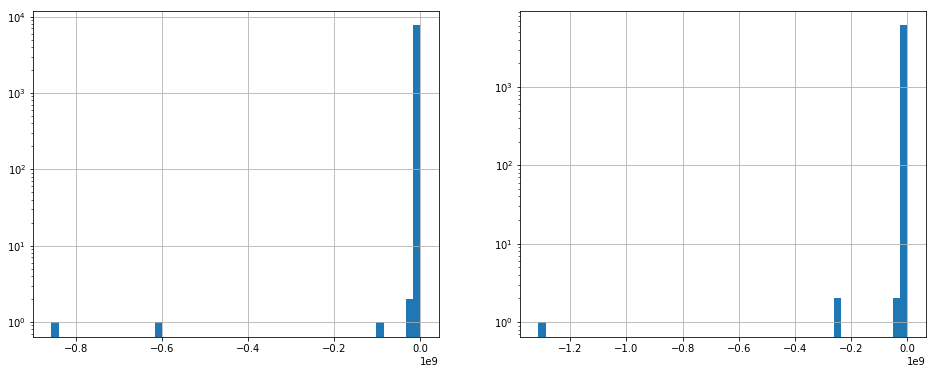

In [104]:
# histogram of negative numbers in entries with y-axis on log scale
# how to display exits too? check the viz tutorial...
fig, ax = plt.subplots(1, 2, figsize=(16,6))

# looking at x axis 
# entries_neg_abs = list(map(abs, entries_neg))
# exits_neg_abs = list(map(abs, exits_neg))
# entries_neg_abs = entries_neg.abs()
# exits_neg_abs = exits_neg.abs()

plots_to_make = [entries_neg, exits_neg]

for series, ax_obj in zip(plots_to_make, ax):
    ax_obj.hist(series, bins=50)
    ax_obj.set_yscale('log')
    ax_obj.grid()

In [109]:
(exits_neg
# .sample(50)
 .sort_values()
# .head(30)
)[75:125]

666613   -7545.0
530087   -7368.0
675054   -7341.0
675257   -6316.0
666645   -3304.0
53252    -2729.0
775227   -2691.0
661890   -2603.0
661896   -2568.0
661842   -2506.0
661932   -2481.0
661938   -2458.0
666624   -2427.0
807002   -2416.0
661848   -2406.0
661860   -2383.0
661884   -2345.0
661854   -2335.0
661975   -2332.0
760489   -2330.0
661994   -2326.0
661926   -2324.0
661945   -2312.0
661981   -2307.0
661902   -2264.0
760549   -2259.0
661866   -2245.0
661824   -2236.0
661976   -2217.0
661891   -2180.0
661849   -2175.0
507390   -2165.0
661903   -2136.0
661843   -2104.0
661908   -2086.0
661982   -2070.0
507474   -2057.0
661897   -2044.0
661855   -2044.0
661939   -2043.0
661989   -2014.0
507360   -2007.0
507480   -2001.0
311181   -1995.0
661927   -1994.0
507517   -1991.0
507438   -1985.0
661825   -1979.0
507384   -1966.0
507529   -1965.0
Name: EX_DIFF, dtype: float64

In [117]:
may_df[666642:666649]

,UNIQUE_STATION,UNIT,C/A,SCP,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ENT_DIFF,EX_DIFF
666642,GROVE STREET - 1,R551,PTH04,00-01-01,PTH,05/14/2017,12:39:42,REGULAR,5726,3075,227.0,70.0
666643,GROVE STREET - 1,R551,PTH04,00-01-01,PTH,05/14/2017,16:50:56,REGULAR,5938,3194,212.0,119.0
666644,GROVE STREET - 1,R551,PTH04,00-01-01,PTH,05/15/2017,07:41:28,REGULAR,6044,3360,106.0,166.0
666645,GROVE STREET - 1,R551,PTH04,00-01-01,PTH,05/15/2017,11:50:47,REGULAR,822,56,-5222.0,-3304.0
666646,GROVE STREET - 1,R551,PTH04,00-01-01,PTH,05/15/2017,16:02:47,REGULAR,1066,196,244.0,140.0
666647,GROVE STREET - 1,R551,PTH04,00-01-01,PTH,05/15/2017,20:14:47,REGULAR,1529,879,463.0,683.0
666648,GROVE STREET - 1,R551,PTH04,00-01-01,PTH,05/16/2017,00:26:47,REGULAR,1603,1145,74.0,266.0


**Here's a couple examples of a potential middle-of-night resets or turnstile swaps.** Replacing ENT_DIFF and EX_DIFF with the values of ENTRIES and EXITS respectively would fix the problem and preserve some semblance of the count, as opposed to replacing them with 0 or NaN.

In [69]:
may_df[662785:662792]

,UNIQUE_STATION,UNIT,C/A,SCP,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ENT_DIFF,EX_DIFF
662785,GRD CNTRL-42 ST - 4567S,R048,R241A,00-00-04,IRT,05/24/2017,05:00:00,REGULAR,856595234,50388728,1.0,1.0
662786,GRD CNTRL-42 ST - 4567S,R048,R241A,00-00-04,IRT,05/24/2017,09:00:00,REGULAR,856595327,50388744,93.0,16.0
662787,GRD CNTRL-42 ST - 4567S,R048,R241A,00-00-04,IRT,05/24/2017,13:00:00,REGULAR,856595404,50388759,77.0,15.0
662788,GRD CNTRL-42 ST - 4567S,R048,R241A,00-00-04,IRT,05/25/2017,09:00:00,REGULAR,95,21,-856595309.0,-50388738.0
662789,GRD CNTRL-42 ST - 4567S,R048,R241A,00-00-04,IRT,05/25/2017,13:00:00,REGULAR,223,40,128.0,19.0
662790,GRD CNTRL-42 ST - 4567S,R048,R241A,00-00-04,IRT,05/25/2017,17:00:00,REGULAR,515,51,292.0,11.0
662791,GRD CNTRL-42 ST - 4567S,R048,R241A,00-00-04,IRT,05/25/2017,21:00:00,REGULAR,1370,54,855.0,3.0


In [70]:
may_df[225039:225046]

,UNIQUE_STATION,UNIT,C/A,SCP,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ENT_DIFF,EX_DIFF
225039,47-50 STS ROCK - BDFM,R020,N501,01-03-03,IND,05/16/2017,08:00:00,REGULAR,13435541,13056577,32.0,315.0
225040,47-50 STS ROCK - BDFM,R020,N501,01-03-03,IND,05/16/2017,16:00:00,REGULAR,13435856,13057921,315.0,1344.0
225041,47-50 STS ROCK - BDFM,R020,N501,01-03-03,IND,05/17/2017,00:00:00,REGULAR,13436663,13058060,807.0,139.0
225042,47-50 STS ROCK - BDFM,R020,N501,01-03-03,IND,05/17/2017,12:00:00,REGULAR,2051,1,-13434612.0,-13058059.0
225043,47-50 STS ROCK - BDFM,R020,N501,01-03-03,IND,05/17/2017,20:00:00,REGULAR,2164,228,113.0,227.0
225044,47-50 STS ROCK - BDFM,R020,N501,01-03-03,IND,05/18/2017,12:00:00,REGULAR,2165,1201,1.0,973.0
225045,47-50 STS ROCK - BDFM,R020,N501,01-03-03,IND,05/18/2017,16:00:00,REGULAR,2165,1467,0.0,266.0


Notice how the entries count on this one resets to a fairly large number, 65804, one that would be highly improbable for traffic through the 96th St Station in the middle of the night.

In [71]:
may_df[366667:366674]

,UNIQUE_STATION,UNIT,C/A,SCP,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ENT_DIFF,EX_DIFF
366667,96 ST - 6,R144,R251,00-03-02,IRT,05/18/2017,17:00:00,REGULAR,19461075,2190400,0.0,145.0
366668,96 ST - 6,R144,R251,00-03-02,IRT,05/18/2017,21:00:00,REGULAR,19461075,2190512,0.0,112.0
366669,96 ST - 6,R144,R251,00-03-02,IRT,05/19/2017,01:00:00,REGULAR,19461075,2190553,0.0,41.0
366670,96 ST - 6,R144,R251,00-03-02,IRT,05/19/2017,05:00:00,REGULAR,65804,19,-19395271.0,-2190534.0
366671,96 ST - 6,R144,R251,00-03-02,IRT,05/19/2017,09:00:00,REGULAR,66604,193,800.0,174.0
366672,96 ST - 6,R144,R251,00-03-02,IRT,05/19/2017,13:00:00,REGULAR,67606,352,1002.0,159.0
366673,96 ST - 6,R144,R251,00-03-02,IRT,05/19/2017,17:00:00,REGULAR,68851,471,1245.0,119.0


This is small for a reset, but seems to be one nonetheless.

In [72]:
may_df[60074:60081]

,UNIQUE_STATION,UNIT,C/A,SCP,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ENT_DIFF,EX_DIFF
60074,14TH STREET - 1,R545,PTH11,00-00-03,PTH,05/10/2017,00:59:08,REGULAR,6208,294,270.0,15.0
60075,14TH STREET - 1,R545,PTH11,00-00-03,PTH,05/10/2017,05:11:08,REGULAR,6245,303,37.0,9.0
60076,14TH STREET - 1,R545,PTH11,00-00-03,PTH,05/10/2017,09:23:08,REGULAR,6524,311,279.0,8.0
60077,14TH STREET - 1,R545,PTH11,00-00-03,PTH,05/10/2017,13:35:05,REGULAR,10,0,-6514.0,-311.0
60078,14TH STREET - 1,R545,PTH11,00-00-03,PTH,05/10/2017,17:47:05,REGULAR,735,14,725.0,14.0
60079,14TH STREET - 1,R545,PTH11,00-00-03,PTH,05/10/2017,21:59:05,REGULAR,1728,35,993.0,21.0
60080,14TH STREET - 1,R545,PTH11,00-00-03,PTH,05/11/2017,02:11:05,REGULAR,1936,46,208.0,11.0


**Here's a couple prime example of a turnstile counting backwards.** I would guess that any negative on the order of 10E3 or smaller is a result of that effect.

In [73]:
may_df[212586:212593]

,UNIQUE_STATION,UNIT,C/A,SCP,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ENT_DIFF,EX_DIFF
212586,42 ST-PORT AUTH - ACENQRS1237W,R011,N063A,00-00-05,IND,05/24/2017,20:00:00,REGULAR,1558096101,923541973,-716.0,581.0
212587,42 ST-PORT AUTH - ACENQRS1237W,R011,N063A,00-00-05,IND,05/25/2017,00:00:00,REGULAR,1558095892,923542119,-209.0,146.0
212588,42 ST-PORT AUTH - ACENQRS1237W,R011,N063A,00-00-05,IND,05/25/2017,04:00:00,REGULAR,1558095886,923542129,-6.0,10.0
212589,42 ST-PORT AUTH - ACENQRS1237W,R011,N063A,00-00-05,IND,05/25/2017,08:00:00,REGULAR,1558094833,923542171,-1053.0,42.0
212590,42 ST-PORT AUTH - ACENQRS1237W,R011,N063A,00-00-05,IND,05/25/2017,12:00:00,REGULAR,1558092906,923542297,-1927.0,126.0
212591,42 ST-PORT AUTH - ACENQRS1237W,R011,N063A,00-00-05,IND,05/25/2017,16:00:00,REGULAR,1558092456,923542572,-450.0,275.0
212592,42 ST-PORT AUTH - ACENQRS1237W,R011,N063A,00-00-05,IND,05/25/2017,20:00:00,REGULAR,1558091664,923543238,-792.0,666.0


In [74]:
may_df[268080:268087]

,UNIQUE_STATION,UNIT,C/A,SCP,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ENT_DIFF,EX_DIFF
268080,59 ST - 456NQRW,R051,R245,00-00-00,IRT,05/14/2017,04:00:00,REGULAR,704335223,721553161,-33.0,5.0
268081,59 ST - 456NQRW,R051,R245,00-00-00,IRT,05/14/2017,08:00:00,REGULAR,704335197,721553175,-26.0,14.0
268082,59 ST - 456NQRW,R051,R245,00-00-00,IRT,05/14/2017,12:00:00,REGULAR,704335128,721553219,-69.0,44.0
268083,59 ST - 456NQRW,R051,R245,00-00-00,IRT,05/14/2017,16:00:00,REGULAR,704334933,721553274,-195.0,55.0
268084,59 ST - 456NQRW,R051,R245,00-00-00,IRT,05/14/2017,20:00:00,REGULAR,704334546,721553315,-387.0,41.0
268085,59 ST - 456NQRW,R051,R245,00-00-00,IRT,05/15/2017,00:00:00,REGULAR,704334436,721553328,-110.0,13.0
268086,59 ST - 456NQRW,R051,R245,00-00-00,IRT,05/15/2017,04:00:00,REGULAR,704334414,721553330,-22.0,2.0


**And now for something completely different...** Notice a giant spike at a non-standard time (index 399528), and then a return to seemingly normal counts directly therafter. Given the correction, it wouldn't affect a sum of each DIFF column, though one could also delete the offending row and be done with it. How to test for this case...

In [75]:
may_df[399526:399533]

,UNIQUE_STATION,UNIT,C/A,SCP,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ENT_DIFF,EX_DIFF
399526,AVENUE M - BQ,R229,B022,00-00-00,BMT,04/30/2017,04:00:00,REGULAR,789855,1091424,6.0,22.0
399527,AVENUE M - BQ,R229,B022,00-00-00,BMT,04/30/2017,08:00:00,REGULAR,789870,1091441,15.0,17.0
399528,AVENUE M - BQ,R229,B022,00-00-00,BMT,04/30/2017,11:00:00,REGULAR,16796105,251705769,16006235.0,250614328.0
399529,AVENUE M - BQ,R229,B022,00-00-00,BMT,04/30/2017,12:00:00,REGULAR,789942,1091510,-16006163.0,-250614259.0
399530,AVENUE M - BQ,R229,B022,00-00-00,BMT,04/30/2017,16:00:00,REGULAR,790002,1091618,60.0,108.0
399531,AVENUE M - BQ,R229,B022,00-00-00,BMT,04/30/2017,20:00:00,REGULAR,790037,1091741,35.0,123.0
399532,AVENUE M - BQ,R229,B022,00-00-00,BMT,05/01/2017,00:00:00,REGULAR,790055,1091798,18.0,57.0


**What in holy hell is going on here??** It would seem that 725206, 725208, 725210, and 725211 were mistakes and should be deleted, probably values missing from some other turnstile that got inserted into this one. Again, if we were just to sum the DIFF columns, it should self-correct.

In [76]:
may_df[725203:725215]

,UNIQUE_STATION,UNIT,C/A,SCP,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ENT_DIFF,EX_DIFF
725203,JOURNAL SQUARE - 1,R552,PTH03,00-00-09,PTH,05/30/2017,00:18:12,REGULAR,8544,9195,75.0,321.0
725204,JOURNAL SQUARE - 1,R552,PTH03,00-00-09,PTH,05/30/2017,04:30:12,REGULAR,8562,9246,18.0,51.0
725205,JOURNAL SQUARE - 1,R552,PTH03,00-00-09,PTH,05/30/2017,08:42:12,REGULAR,9774,9369,1212.0,123.0
725206,JOURNAL SQUARE - 1,R552,PTH03,00-00-09,PTH,05/30/2017,12:48:26,REGULAR,557,39,-9217.0,-9330.0
725207,JOURNAL SQUARE - 1,R552,PTH03,00-00-09,PTH,05/30/2017,16:52:12,REGULAR,11187,10105,10630.0,10066.0
725208,JOURNAL SQUARE - 1,R552,PTH03,00-00-09,PTH,05/30/2017,20:58:26,REGULAR,1110,263,-10077.0,-9842.0
725209,JOURNAL SQUARE - 1,R552,PTH03,00-00-09,PTH,05/31/2017,01:02:12,REGULAR,11462,12052,10352.0,11789.0
725210,JOURNAL SQUARE - 1,R552,PTH03,00-00-09,PTH,05/31/2017,05:08:26,REGULAR,1179,353,-10283.0,-11699.0
725211,JOURNAL SQUARE - 1,R552,PTH03,00-00-09,PTH,05/31/2017,09:20:26,REGULAR,2152,372,973.0,19.0
725212,JOURNAL SQUARE - 1,R552,PTH03,00-00-09,PTH,05/31/2017,13:24:12,REGULAR,13704,12443,11552.0,12071.0


**And another special case,** one in which a turnstile counter was switched out in real-time:

In [116]:
may_df[53249:53256]

,UNIQUE_STATION,UNIT,C/A,SCP,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ENT_DIFF,EX_DIFF
53249,14 ST-UNION SQ - LNQR456W,R170,A037,05-00-00,BMT,05/25/2017,05:00:00,REGULAR,1810,1333,0.0,11.0
53250,14 ST-UNION SQ - LNQR456W,R170,A037,05-00-00,BMT,05/25/2017,09:00:00,REGULAR,1851,1902,41.0,569.0
53251,14 ST-UNION SQ - LNQR456W,R170,A037,05-00-00,BMT,05/25/2017,13:00:00,REGULAR,1921,2729,70.0,827.0
53252,14 ST-UNION SQ - LNQR456W,R170,A037,05-00-00,BMT,05/25/2017,17:00:00,REGULAR,589824,0,587903.0,-2729.0
53253,14 ST-UNION SQ - LNQR456W,R170,A037,05-00-00,BMT,05/25/2017,21:00:00,RECOVR AUD,589942,505,118.0,505.0
53254,14 ST-UNION SQ - LNQR456W,R170,A037,05-00-00,BMT,05/26/2017,01:00:00,REGULAR,589942,630,0.0,125.0
53255,14 ST-UNION SQ - LNQR456W,R170,A037,05-00-00,BMT,05/26/2017,05:00:00,REGULAR,589942,643,0.0,13.0


### Setting the filter threshold

Nearly all values between -3000 > n > 0 can be attributed to a reverse-counting turnstile, and all values n < -3000 can be attrubuted to a reset. To correct, I'll check for an absolute value of 3000 in either ENT_DIFF or EX_DIFF and replace both with 0 or NaN. But first, a quick look at positive values in that range...

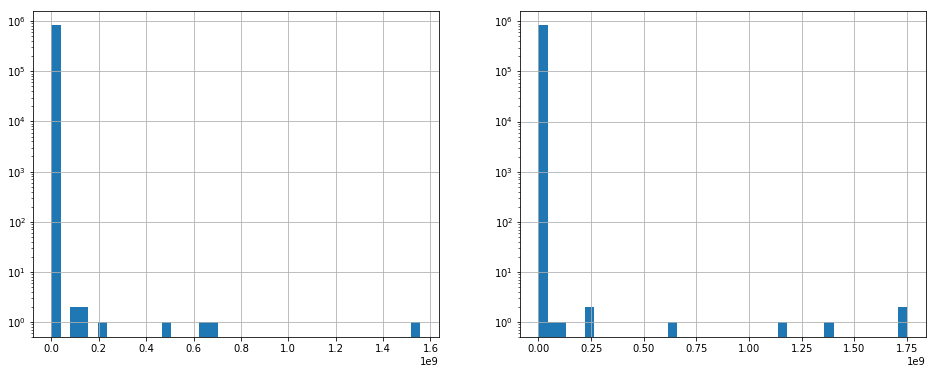

In [181]:
min_val = 0
max_val = 16000

ent_pos_slice = may_df[(may_df['ENT_DIFF'] > min_val) & (may_df['ENT_DIFF'] < max_val)]['ENT_DIFF']
ex_pos_slice = may_df[(may_df['EX_DIFF'] > min_val) & (may_df['EX_DIFF'] < max_val)]['EX_DIFF']

ent_pos = may_df[may_df['ENT_DIFF'] > 0]['ENT_DIFF']
ex_pos = may_df[may_df['EX_DIFF'] > 0]['EX_DIFF']


plots_to_make = [ent_pos, ex_pos]

fig, ax = plt.subplots(1, 2, figsize=(16,6))

for series, ax_obj in zip(plots_to_make, ax):
    ax_obj.hist(series, bins=40)
    ax_obj.set_yscale('log')
    ax_obj.grid()

In [187]:
ent_pos.describe()

count    8.216090e+05
mean     5.293635e+03
std      2.108554e+06
min      1.000000e+00
25%      3.200000e+01
50%      1.200000e+02
75%      2.990000e+02
max      1.557696e+09
Name: ENT_DIFF, dtype: float64

In [172]:
ent_pos_slice.sort_values()

656419     4007.0
659838     4009.0
656529     4021.0
723234     4040.0
199851     4044.0
656402     4051.0
656494     4051.0
656488     4173.0
656482     4193.0
722185     4194.0
970288     4229.0
775803     4300.0
656444     4310.0
721765     4351.0
656408     4481.0
661728     4517.0
721975     4880.0
656505     5039.0
723024     5056.0
720925     5506.0
360600     6056.0
970481     7149.0
725209    10352.0
725207    10630.0
725212    11552.0
Name: ENT_DIFF, dtype: float64

**Here we have a few cases of turnstiles that didn't provide data for several days,** then dumped it all at once and resumed operations as normal. If we had more time, we could enter new cells and fill them according to usual movement on that day and the total difference in lost time. BUT...

In [170]:
may_df[970478:970485]

,UNIQUE_STATION,UNIT,C/A,SCP,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ENT_DIFF,EX_DIFF
970478,WILSON AV - L,R295,H032,00-00-02,BMT,05/09/2017,20:00:00,REGULAR,6388413,5392233,430.0,460.0
970479,WILSON AV - L,R295,H032,00-00-02,BMT,05/10/2017,00:00:00,REGULAR,6388543,5392570,130.0,337.0
970480,WILSON AV - L,R295,H032,00-00-02,BMT,05/10/2017,04:00:00,REGULAR,6388571,5392656,28.0,86.0
970481,WILSON AV - L,R295,H032,00-00-02,BMT,05/13/2017,00:00:00,REGULAR,6395720,5396288,7149.0,3632.0
970482,WILSON AV - L,R295,H032,00-00-02,BMT,05/13/2017,04:00:00,REGULAR,6395780,5396430,60.0,142.0
970483,WILSON AV - L,R295,H032,00-00-02,BMT,05/13/2017,08:00:00,REGULAR,6395939,5396461,159.0,31.0
970484,WILSON AV - L,R295,H032,00-00-02,BMT,05/13/2017,12:00:00,REGULAR,6396316,5396505,377.0,44.0


In [151]:
may_df[775800:775807]

,UNIQUE_STATION,UNIT,C/A,SCP,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ENT_DIFF,EX_DIFF
775800,METROPOLITAN AV - M,R100,K026,00-00-04,BMT,05/16/2017,09:54:42,REGULAR,4740551,5869991,242.0,52.0
775801,METROPOLITAN AV - M,R100,K026,00-00-04,BMT,05/16/2017,12:00:00,REGULAR,4740643,5870057,92.0,66.0
775802,METROPOLITAN AV - M,R100,K026,00-00-04,BMT,05/16/2017,16:00:00,REGULAR,4740918,5870237,275.0,180.0
775803,METROPOLITAN AV - M,R100,K026,00-00-04,BMT,05/20/2017,00:00:00,REGULAR,4745218,5873623,4300.0,3386.0
775804,METROPOLITAN AV - M,R100,K026,00-00-04,BMT,05/20/2017,04:00:00,REGULAR,4745218,5873623,0.0,0.0
775805,METROPOLITAN AV - M,R100,K026,00-00-04,BMT,05/20/2017,08:00:00,REGULAR,4745218,5873623,0.0,0.0
775806,METROPOLITAN AV - M,R100,K026,00-00-04,BMT,05/20/2017,12:00:00,REGULAR,4745218,5873623,0.0,0.0


In [155]:
may_df[721972:721979]

,UNIQUE_STATION,UNIT,C/A,SCP,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ENT_DIFF,EX_DIFF
721972,JKSN HT-ROOSVLT - EFMR7,R018,N324,00-03-02,IND,05/25/2017,08:00:00,REGULAR,3900459,1511864,1292.0,79.0
721973,JKSN HT-ROOSVLT - EFMR7,R018,N324,00-03-02,IND,05/25/2017,12:00:00,REGULAR,3901603,1512012,1144.0,148.0
721974,JKSN HT-ROOSVLT - EFMR7,R018,N324,00-03-02,IND,05/25/2017,16:00:00,REGULAR,3902245,1512318,642.0,306.0
721975,JKSN HT-ROOSVLT - EFMR7,R018,N324,00-03-02,IND,05/27/2017,00:00:00,REGULAR,3907125,1514750,4880.0,2432.0
721976,JKSN HT-ROOSVLT - EFMR7,R018,N324,00-03-02,IND,05/27/2017,04:00:00,REGULAR,3907223,1514900,98.0,150.0
721977,JKSN HT-ROOSVLT - EFMR7,R018,N324,00-03-02,IND,05/27/2017,08:00:00,RECOVR AUD,3907487,1514970,264.0,70.0
721978,JKSN HT-ROOSVLT - EFMR7,R018,N324,00-03-02,IND,05/27/2017,12:00:00,RECOVR AUD,3908123,1515075,636.0,105.0


### We have thresholds!!

Anything between -3000 and 8000 in the differentials columns will be treated as a real value.

## Filtering the anomalies and finding the busiest stations

In [189]:
may_df.loc[
    (may_df['ENT_DIFF'] < -3000) | (may_df['EX_DIFF'] < -3000),
    ['ENT_DIFF', 'EX_DIFF']] = 0.0

may_df.loc[
    (may_df['ENT_DIFF'] > 8000) | (may_df['EX_DIFF'] > 8000),
    ['ENT_DIFF', 'EX_DIFF']] = 0.0

In [190]:
may_df['ENTD_ABS'] = may_df['ENT_DIFF'].abs()
may_df['EXD_ABS'] = may_df['EX_DIFF'].abs()

In [192]:
may_df.head(5)

,UNIQUE_STATION,UNIT,C/A,SCP,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ENT_DIFF,EX_DIFF,ENTD_ABS,EXD_ABS
0,1 AV - L,R248,H007,00-00-00,BMT,04/29/2017,00:00:00,REGULAR,12278147,13533772,0.0,0.0,0.0,0.0
1,1 AV - L,R248,H007,00-00-00,BMT,04/29/2017,04:00:00,REGULAR,12278188,13534099,41.0,327.0,41.0,327.0
2,1 AV - L,R248,H007,00-00-00,BMT,04/29/2017,08:00:00,REGULAR,12278271,13534359,83.0,260.0,83.0,260.0
3,1 AV - L,R248,H007,00-00-00,BMT,04/29/2017,12:00:00,REGULAR,12278813,13535235,542.0,876.0,542.0,876.0
4,1 AV - L,R248,H007,00-00-00,BMT,04/29/2017,16:00:00,REGULAR,12279597,13536282,784.0,1047.0,784.0,1047.0


In [206]:
may_station_traffic = may_df.groupby('UNIQUE_STATION')['ENTD_ABS', 'EXD_ABS'].sum()
may_station_traffic.sort_values('ENTD_ABS', ascending=False).head(20)

,ENTD_ABS,EXD_ABS
UNIQUE_STATION,,
GRD CNTRL-42 ST - 4567S,4316665.0,3923359.0
34 ST-HERALD SQ - BDFMNQRW,3859645.0,3376238.0
42 ST-PORT AUTH - ACENQRS1237W,2749616.0,1982008.0
34 ST-PENN STA - ACE,2386483.0,2109890.0
14 ST-UNION SQ - LNQR456W,2283822.0,1992895.0
TIMES SQ-42 ST - 1237ACENQRSW,2065815.0,1983959.0
FLUSHING-MAIN - 7,1879372.0,1449510.0
59 ST COLUMBUS - ABCD1,1841777.0,1470184.0
FULTON ST - 2345ACJZ,1739328.0,1602455.0


In [203]:
may_station_traffic_total = may_station_traffic['ENTD_ABS'] + may_station_traffic['EXD_ABS']
may_station_traffic_total.sort_values(ascending=False).head(30)

UNIQUE_STATION
GRD CNTRL-42 ST - 4567S           8240024.0
34 ST-HERALD SQ - BDFMNQRW        7235883.0
42 ST-PORT AUTH - ACENQRS1237W    4731624.0
34 ST-PENN STA - ACE              4496373.0
14 ST-UNION SQ - LNQR456W         4276717.0
TIMES SQ-42 ST - 1237ACENQRSW     4049774.0
47-50 STS ROCK - BDFM             3364929.0
FULTON ST - 2345ACJZ              3341783.0
FLUSHING-MAIN - 7                 3328882.0
59 ST COLUMBUS - ABCD1            3311961.0
PATH NEW WTC - 1                  2979159.0
JKSN HT-ROOSVLT - EFMR7           2835275.0
86 ST - 456                       2767962.0
34 ST-PENN STA - 123ACE           2728469.0
CANAL ST - JNQRZ6W                2717958.0
W 4 ST-WASH SQ - ABCDEFM          2646431.0
59 ST - 456NQRW                   2608357.0
72 ST - 123                       2541280.0
LEXINGTON AV/53 - EM6             2493077.0
42 ST-BRYANT PK - BDFM7           2405450.0
96 ST - 123                       2386569.0
JAMAICA CENTER - EJZ              2211386.0
34 ST-PENN STA - 